In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

In [3]:
heartDiseaseDataframe = pd.read_csv('./Heart Disease.csv')

heartDiseaseDataframe

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


**<h3>Data Analyzing<h3>**

In [4]:
#checking null values
nullValuesBefore = heartDiseaseDataframe.isnull().sum()
print(nullValuesBefore)

gender                                0
age                                   0
education                           105
currentSmoker                         0
cigsPerDay                           29
BPMeds                               53
prevalentStroke                       0
prevalentHyp                          0
diabetes                              0
totChol                              50
sysBP                                 0
diaBP                                 0
BMI                                  19
heartRate                             1
glucose                             388
Heart Disease (in next 10 years)      0
dtype: int64


In [5]:
heartDiseaseDataframe['Heart Disease (in next 10 years)'].value_counts()
# class imbalannce 

Heart Disease (in next 10 years)
0    3596
1     644
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Heart Disease Count')

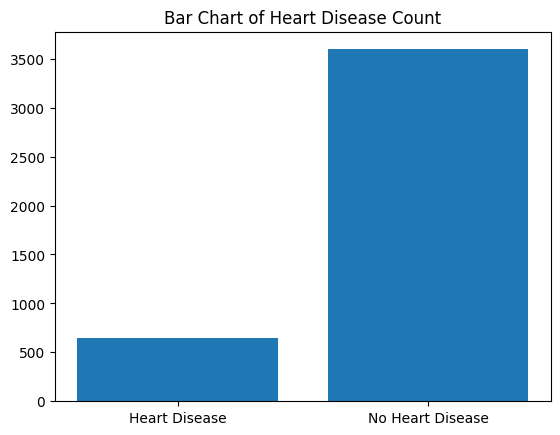

In [6]:
labels = ["Heart Disease", "No Heart Disease"]
values = [644, 3596 ]

plt.bar(labels, values)
plt.title('Bar Chart of Heart Disease Count')

**<h3>DATA PRE-PROCESSING<h3>**

In [7]:
# all about missing values in the dataset

print("length of the dataset: ", len(heartDiseaseDataframe))
print("================================\n")
print("Total null values in each column\n")
print(heartDiseaseDataframe.isna().sum())

print("================================\n")
totalNullsCount = heartDiseaseDataframe.isnull().sum().sum()
print(f"Total null values: {totalNullsCount}\n")

length of the dataset:  4240

Total null values in each column

gender                                0
age                                   0
education                           105
currentSmoker                         0
cigsPerDay                           29
BPMeds                               53
prevalentStroke                       0
prevalentHyp                          0
diabetes                              0
totChol                              50
sysBP                                 0
diaBP                                 0
BMI                                  19
heartRate                             1
glucose                             388
Heart Disease (in next 10 years)      0
dtype: int64

Total null values: 645



In [8]:
colsWithNull = heartDiseaseDataframe.columns[heartDiseaseDataframe.isna().any()].tolist()
print(colsWithNull) #an list of columns with null values

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [9]:
for column in colsWithNull:
    print(f"Column: {column}\nDataType: {heartDiseaseDataframe[column].dtype}\n{"="*20}")
    
# as all the columns aare float (numeric) type, we can replace them with mean

Column: education
DataType: float64
Column: cigsPerDay
DataType: float64
Column: BPMeds
DataType: float64
Column: totChol
DataType: float64
Column: BMI
DataType: float64
Column: heartRate
DataType: float64
Column: glucose
DataType: float64


In [10]:
# handle columns with null values

# null columns with categorical values ==> BPMeds ==> Filling with mode
# other null columns are numeric == > filling with median
for column in colsWithNull:
    if column == 'BPMeds':
        BPMedsMode = heartDiseaseDataframe[column].mode()[0]
        heartDiseaseDataframe[column] = heartDiseaseDataframe[column].fillna(BPMedsMode)
    else:
        columnMedian = heartDiseaseDataframe[column].median()
        heartDiseaseDataframe[column] = heartDiseaseDataframe[column].fillna(columnMedian)


# after processing
print("Total null values in each column (After pre-processing)")
heartDiseaseDataframe.isna().sum()

Total null values in each column (After pre-processing)


gender                              0
age                                 0
education                           0
currentSmoker                       0
cigsPerDay                          0
BPMeds                              0
prevalentStroke                     0
prevalentHyp                        0
diabetes                            0
totChol                             0
sysBP                               0
diaBP                               0
BMI                                 0
heartRate                           0
glucose                             0
Heart Disease (in next 10 years)    0
dtype: int64

In [11]:

nonNumericColumns = heartDiseaseDataframe.select_dtypes(exclude=['number']).columns.tolist()
print(nonNumericColumns)

['gender']


In [12]:
heartDiseaseDataframe['gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
4235    Female
4236    Female
4237    Female
4238      Male
4239    Female
Name: gender, Length: 4240, dtype: object

In [13]:
# Gender column needs encodding as it is a non Numberic column
encoder = LabelEncoder()
heartDiseaseDataframe['gender'] = encoder.fit_transform(heartDiseaseDataframe['gender'])

# male == 1, female == 0

heartDiseaseDataframe['gender']
# in case of multiple colums, we can use loop
# for categorical_col in nonNumericColumns:
#     heartDiseaseDataframe[categorical_col] = encoder.fit_transform(heartDiseaseDataframe[categorical_col])

0       1
1       0
2       1
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    1
4239    0
Name: gender, Length: 4240, dtype: int64

In [14]:
# after all preprocessing
heartDiseaseDataframe

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [15]:
heartDiseaseDataframe.dtypes

gender                                int64
age                                   int64
education                           float64
currentSmoker                         int64
cigsPerDay                          float64
BPMeds                              float64
prevalentStroke                       int64
prevalentHyp                          int64
diabetes                              int64
totChol                             float64
sysBP                               float64
diaBP                               float64
BMI                                 float64
heartRate                           float64
glucose                             float64
Heart Disease (in next 10 years)      int64
dtype: object

**<h3>Scaling<h3>**

In [16]:
# before scaling

features = heartDiseaseDataframe.drop(columns=['Heart Disease (in next 10 years)'])
result_column = heartDiseaseDataframe['Heart Disease (in next 10 years)']


X_train, X_test, Y_train, Y_test = train_test_split(features, result_column, test_size=0.25, random_state=1)

for col in X_train.columns.to_list():
    col_var = np.var(X_train[col])
    print(f"{col}: {col_var}")

gender: 0.2445852616589533
age: 73.85676041295835
education: 1.027643190538349
currentSmoker: 0.24995639017443927
cigsPerDay: 143.71257505636643
BPMeds: 0.028389996440014238
prevalentStroke: 0.004383133578576798
prevalentHyp: 0.21235423836082434
diabetes: 0.02422560420869427
totChol: 1988.8034686127924
sysBP: 476.1910777609667
diaBP: 139.45227947865985
BMI: 16.295234895534193
heartRate: 144.9608919742099
glucose: 435.32889521775246


In [17]:
heartDiseaseDataframe

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [18]:
# after scaling

scaler = StandardScaler()

features_list = features.columns.to_list()
heartDiseaseDataframe[features_list] = scaler.fit_transform(heartDiseaseDataframe[features_list])

In [19]:
features = heartDiseaseDataframe.drop(columns=['Heart Disease (in next 10 years)'])
result_column = heartDiseaseDataframe['Heart Disease (in next 10 years)']


X_train, X_test, Y_train, Y_test = train_test_split(features, result_column, test_size=0.25, random_state=1)

In [20]:
for col in X_train.columns.to_list():
    col_var = np.var(X_train[col])
    print(f"{col}: {col_var}")

gender: 0.9983325765143947
age: 1.0051546946801106
education: 1.0134699116887131
currentSmoker: 0.9999646177211808
cigsPerDay: 1.0142725150132381
BPMeds: 0.9999999999999999
prevalentStroke: 0.7477885857387636
prevalentHyp: 0.9916948464279856
diabetes: 0.9672185960753714
totChol: 1.0123452222881197
sysBP: 0.981125613993884
diaBP: 0.9832767398530121
BMI: 0.9835783157023441
heartRate: 1.002905248639532
glucose: 0.8332101821437083


In [21]:
heartDiseaseDataframe

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,1.153113,-1.234283,2.006069,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287,0
1,-0.867217,-0.417664,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036,0
2,1.153113,-0.184345,-0.973172,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530,0
3,-0.867217,1.332233,1.012988,1.011863,1.768882,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188,1
4,-0.867217,-0.417664,1.012988,1.011863,1.180813,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.019908,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.255674,-0.061487,-0.915087,-0.933349,0.675501,0.192455,0
4236,-0.867217,-0.650984,-0.973172,1.011863,0.508735,-0.173569,-0.077014,-0.671241,-0.162437,-0.601664,-0.265747,0.344466,-1.631087,0.841856,-0.157538,0
4237,-0.867217,0.282295,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.729466,0.051991,0.008585,-1.063561,0.342792,1.111184,0
4238,1.153113,-1.117623,1.012988,-0.988276,-0.751412,-0.173569,-0.077014,1.489778,-0.162437,-1.165702,0.392425,1.268138,-0.048892,-0.738512,-0.420032,0


**<h3>Training</h3>**

In [22]:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, Y_train)
Y_predicted_logistic = log_model.predict(X_test)

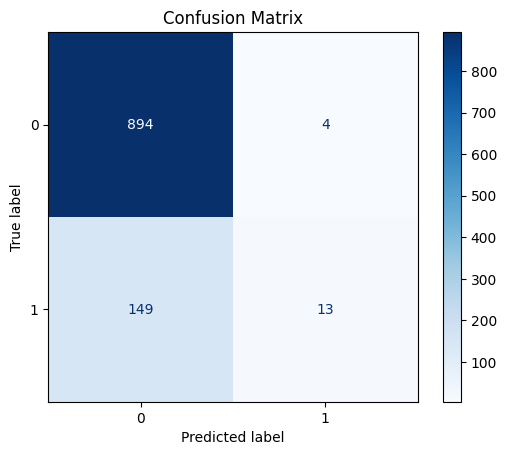

Logistic Regression Accuracy: 0.8556603773584905


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


cm = confusion_matrix(Y_test, Y_predicted_logistic)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_predicted_logistic))

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(Y_test, Y_predicted_logistic))
print("Precision:", precision_score(Y_test, Y_predicted_logistic))
print("Recall:", recall_score(Y_test, Y_predicted_logistic))
print("F1 Score:", f1_score(Y_test, Y_predicted_logistic))


Accuracy: 0.8556603773584905
Precision: 0.7647058823529411
Recall: 0.08024691358024691
F1 Score: 0.1452513966480447
